# Practical No. 9: Correlation Coefficient with Visualization

---- Correlation Coefficient Program ----
Enter values for X and Y:

Original Data:
      X     Y
0  10.0  20.0
1  20.0  40.0
2  30.0  50.0
3  40.0  70.0
4  50.0  80.0

Correlation Coefficient (manual formula) = 0.9934
Correlation Coefficient (pandas corr) = 0.9934

Interpretation: Positive correlation


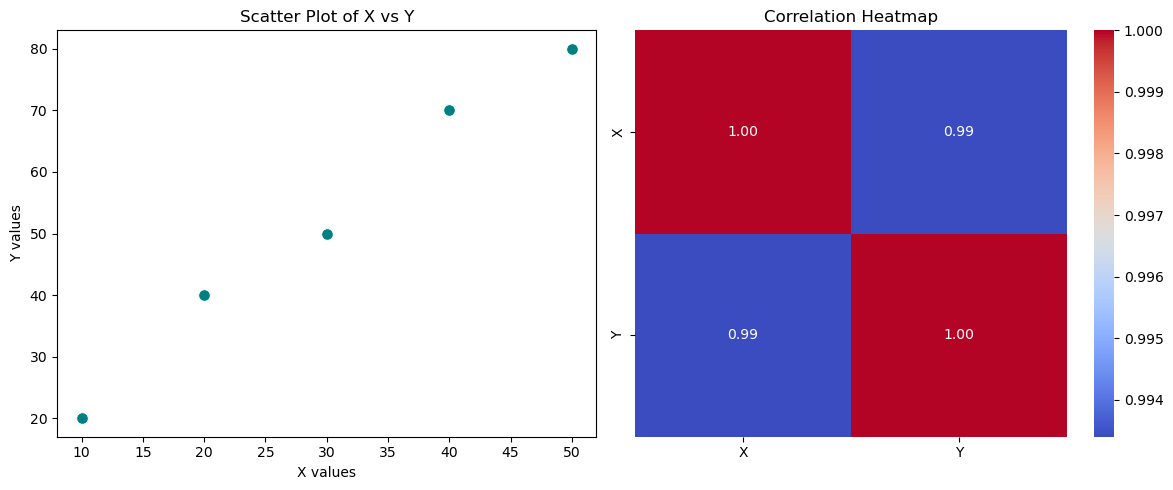

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("---- Correlation Coefficient Program ----")

# ---- Step 1: Input Data ----
choice = input("Enter '1' for manual input or '2' to read from CSV file: ")

if choice == '1':
    n = int(input("Enter number of data points: "))
    x = []
    y = []
    print("Enter values for X and Y:")
    for i in range(n):
        x_val = float(input(f"X[{i+1}]: "))
        y_val = float(input(f"Y[{i+1}]: "))
        x.append(x_val)
        y.append(y_val)
    df = pd.DataFrame({'X': x, 'Y': y})

elif choice == '2':
    file_path = input("Enter CSV file path: ")
    col1 = input("Enter first column name (X): ")
    col2 = input("Enter second column name (Y): ")
    df = pd.read_csv(file_path)
    df = df[[col1, col2]].rename(columns={col1: 'X', col2: 'Y'})

else:
    print("Invalid choice! Exiting program.")
    exit()

print("\nOriginal Data:")
print(df)

# ---- Step 2: Calculate Correlation Coefficient ----
# Formula: r = Σ((Xi - X̄)(Yi - Ȳ)) / sqrt(Σ(Xi - X̄)^2 * Σ(Yi - Ȳ)^2)
x_mean = df['X'].mean()
y_mean = df['Y'].mean()

numerator = ((df['X'] - x_mean) * (df['Y'] - y_mean)).sum()
denominator = np.sqrt(((df['X'] - x_mean)**2).sum() * ((df['Y'] - y_mean)**2).sum())
r = numerator / denominator

print(f"\nCorrelation Coefficient (manual formula) = {r:.4f}")

# Using Pandas built-in method for verification
r_builtin = df['X'].corr(df['Y'])
print(f"Correlation Coefficient (pandas corr) = {r_builtin:.4f}")

# ---- Step 3: Interpretation ----
if r > 0:
    relation = "Positive correlation"
elif r < 0:
    relation = "Negative correlation"
else:
    relation = "No correlation"

print(f"\nInterpretation: {relation}")

# ---- Step 4: Visualization ----
plt.figure(figsize=(12, 5))

# (a) Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', data=df, color='teal', s=70)
plt.title("Scatter Plot of X vs Y")
plt.xlabel("X values")
plt.ylabel("Y values")

# (b) Heatmap of Correlation
plt.subplot(1, 2, 2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()